25


<Axes: >

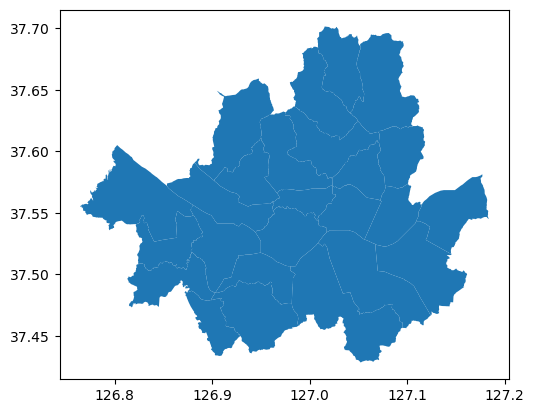

In [ ]:
import geopandas as gpd

gu = gpd.read_file("BND_SIGUNGU_PG/BND_SIGUNGU_PG.shp", encoding="cp949")

# 1) 원본 CRS 지정(추정: 5186) -> 안 맞으면 5179로 바꿔 재시도
gu = gu.set_crs(epsg=5186)   # or: gu = gu.set_crs(epsg=5179)

# 2) WGS84로 변환
gu = gu.to_crs(epsg=4326)

# 서울특별시
# SIGUNGU_CD를 문자열로 변환 후 '11'로 시작하는지 확인
gu_seoul = gu[gu["SIGUNGU_CD"].astype(str).str.startswith("11")]

print(len(gu_seoul))  # 서울은 25개 자치구 예상
gu_seoul.plot()

# print(gu.crs)
# print(len(gu))
# print(gu.total_bounds)  # [minx, miny, maxx, maxy] 확인: 대략 [126~127.x, 37~37.8]면 OK

# # 3) 확인
# gu.plot()



In [16]:
print(gu)

    BASE_DATE SIGUNGU_CD SIGUNGU_NM  \
0    20240630      11060       동대문구   
1    20240630      11070        중랑구   
2    20240630      11080        성북구   
3    20240630      11090        강북구   
4    20240630      11100        도봉구   
..        ...        ...        ...   
247  20240630      38580        함양군   
248  20240630      38590        거창군   
249  20240630      38600        합천군   
250  20240630      39010        제주시   
251  20240630      39020       서귀포시   

                                              geometry  
0    POLYGON ((127.06937 37.60828, 127.06938 37.607...  
1    POLYGON ((127.11131 37.62069, 127.11193 37.620...  
2    POLYGON ((126.98396 37.63644, 126.9842 37.6363...  
3    POLYGON ((127.00459 37.68507, 127.00553 37.684...  
4    POLYGON ((127.01983 37.70102, 127.02215 37.699...  
..                                                 ...  
247  POLYGON ((127.69596 35.75773, 127.69647 35.757...  
248  POLYGON ((127.88313 35.90586, 127.88299 35.905...  
249  POLYGON ((128

In [ ]:
print(gu["geometry"])

0      POLYGON ((127.06937 37.60828, 127.06938 37.607...
1      POLYGON ((127.11131 37.62069, 127.11193 37.620...
2      POLYGON ((126.98396 37.63644, 126.9842 37.6363...
3      POLYGON ((127.00459 37.68507, 127.00553 37.684...
4      POLYGON ((127.01983 37.70102, 127.02215 37.699...
                             ...                        
247    POLYGON ((127.69596 35.75773, 127.69647 35.757...
248    POLYGON ((127.88313 35.90586, 127.88299 35.905...
249    POLYGON ((128.09861 35.83067, 128.09899 35.830...
250    MULTIPOLYGON (((126.16791 33.28282, 126.1679 3...
251    MULTIPOLYGON (((126.26475 33.11572, 126.26476 ...
Name: geometry, Length: 252, dtype: geometry
<class 'geopandas.geodataframe.GeoDataFrame'>


In [17]:
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

NAME_COL = "SIGUNGU_NM"  # ← 여기를 실제 구 이름 컬럼으로 바꿔주세요

# 1) 구 이름 목록과 고정 팔레트 만들기 (tab20에서 N개 색 뽑기)
names = sorted(gu_seoul[NAME_COL].astype(str).unique())
cmap = plt.get_cmap("tab20", len(names))
name2color = {n: mcolors.to_hex(cmap(i)) for i, n in enumerate(names)}

# 2) 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11, tiles="CartoDB positron")

# 3) 구별 색칠 + 툴팁
folium.GeoJson(
    gu_seoul,
    style_function=lambda f: {
        "fillColor": name2color.get(f["properties"][NAME_COL], "#cccccc"),
        "color": "#333333",
        "weight": 1,
        "fillOpacity": 0.8,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=[NAME_COL, "SIGUNGU_CD"], 
        aliases=["자치구", "코드"], 
        localize=True
    ),
    name="서울 자치구(범주색)"
).add_to(m)

folium.LayerControl(collapsed=False).add_to(m)
m.save("seoul_gu_categories.html")
print("Saved: seoul_gu_categories.html")


Saved: seoul_gu_categories.html
